In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

final_df = pd.read_pickle('final_df.pkl')
final_df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,STATION_LINENAME,DATETIME,DIFF_HRS,DIFF_ENTRIES,DIFF_EXITS,DAY,DIFF_HRS_ROUND
0,35983,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,01:00:00,REGULAR,2699588,3509815,"(LIVONIA AV, L)",2019-07-06 01:00:00,NaT,NaN,NaN,5,NaT
1,35984,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,05:00:00,REGULAR,2699590,3509838,"(LIVONIA AV, L)",2019-07-06 05:00:00,04:00:00,2.0,23.0,5,4
2,35985,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,09:00:00,REGULAR,2699633,3509889,"(LIVONIA AV, L)",2019-07-06 09:00:00,04:00:00,43.0,51.0,5,4
3,35986,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,13:00:00,REGULAR,2699686,3509949,"(LIVONIA AV, L)",2019-07-06 13:00:00,04:00:00,53.0,60.0,5,4
4,35987,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,17:00:00,REGULAR,2699751,3510012,"(LIVONIA AV, L)",2019-07-06 17:00:00,04:00:00,65.0,63.0,5,4


In [171]:
total_traffic = final_df["DIFF_ENTRIES"] + final_df["DIFF_EXITS"]
final_df['TOTAL_TRAF'] = total_traffic
station_ent_data = final_df.groupby(['STATION','TIME']).agg({'DIFF_ENTRIES':'sum'})
station_ent_data1 = final_df.groupby(['STATION']).agg({'DIFF_ENTRIES':'sum'})
station_ent_data2 = final_df.groupby(['STATION','TIME','DAY']).agg({'DIFF_ENTRIES':'median'})
station_ent_data3 = final_df.groupby(['STATION','TIME','DAY']).agg({'DIFF_EXITS':'median'})
station_ent_data4 = final_df.groupby(['STATION','TIME','DAY']).agg({'TOTAL_TRAF':'median'})

In [169]:
final_df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,STATION_LINENAME,DATETIME,DIFF_HRS,DIFF_ENTRIES,DIFF_EXITS,DAY,DIFF_HRS_ROUND,TOTAL_TRAF
0,35983,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,01:00:00,REGULAR,2699588,3509815,"(LIVONIA AV, L)",2019-07-06 01:00:00,NaT,NaN,NaN,5,NaT,NaN
1,35984,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,05:00:00,REGULAR,2699590,3509838,"(LIVONIA AV, L)",2019-07-06 05:00:00,04:00:00,2.0,23.0,5,4,25.0
2,35985,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,09:00:00,REGULAR,2699633,3509889,"(LIVONIA AV, L)",2019-07-06 09:00:00,04:00:00,43.0,51.0,5,4,94.0
3,35986,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,13:00:00,REGULAR,2699686,3509949,"(LIVONIA AV, L)",2019-07-06 13:00:00,04:00:00,53.0,60.0,5,4,113.0
4,35987,H038,R350,00-00-00,LIVONIA AV,L,BMT,07/06/2019,17:00:00,REGULAR,2699751,3510012,"(LIVONIA AV, L)",2019-07-06 17:00:00,04:00:00,65.0,63.0,5,4,128.0


                TIME  DAY  DIFF_EXITS
STATION                              
LIVONIA AV  01:00:00    0        29.0
LIVONIA AV  01:00:00    1        40.0
LIVONIA AV  01:00:00    2        47.0
LIVONIA AV  01:00:00    3        39.0
LIVONIA AV  01:00:00    4        47.0
LIVONIA AV  01:00:00    5        54.0
LIVONIA AV  01:00:00    6        40.0
LIVONIA AV  04:55:40    6        11.0
LIVONIA AV  05:00:00    0         8.0
LIVONIA AV  05:00:00    1         9.0
LIVONIA AV  05:00:00    2        11.0
LIVONIA AV  05:00:00    3        10.0
LIVONIA AV  05:00:00    4        10.0
LIVONIA AV  05:00:00    5        12.0
LIVONIA AV  05:00:00    6        12.0
LIVONIA AV  09:00:00    0        91.0
LIVONIA AV  09:00:00    1        99.0
LIVONIA AV  09:00:00    2       103.0
LIVONIA AV  09:00:00    3       103.0
LIVONIA AV  09:00:00    4        99.0
LIVONIA AV  09:00:00    5        41.0
LIVONIA AV  09:00:00    6        14.0
LIVONIA AV  10:03:47    0        26.0
LIVONIA AV  13:00:00    0        78.0
LIVONIA AV  

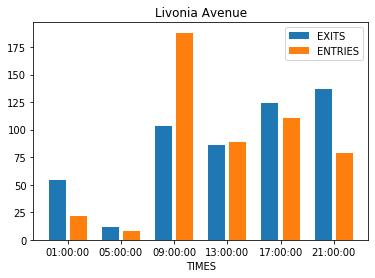

In [177]:
final_df4 = station_ent_data2.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
final_df5 = station_ent_data3.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
#plt.plot(final_df4.loc[:,'TIME'],final_df4.loc[:,'DIFF_ENTRIES'])
final_df4 = final_df4.loc['LIVONIA AV']
final_df5 = final_df5.loc['LIVONIA AV']
print(final_df5)
final_df4 = final_df4.reset_index().sort_values(['DAY']).set_index('TIME')
final_df5 = final_df5.reset_index().sort_values(['DAY']).set_index('TIME')
final_df4.drop(['10:03:47', '04:55:40'], inplace = True)
final_df5.drop(['10:03:47', '04:55:40'], inplace = True)
final_df4 = final_df4.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
final_df5 = final_df5.reset_index().sort_values(['TIME','DAY']).set_index('STATION')

final_df4 = final_df4.replace(['01:00:00','05:00:00','09:00:00','13:00:00','17:00:00','21:00:00'],[0, 2.5, 5, 7.5, 10, 12.5])
r1 = final_df4.loc[:,'TIME']
r2 = [x + 1 for x in r1]

plt.bar(r1,final_df5.loc[:,'DIFF_EXITS'], label='EXITS')
plt.bar(r2,final_df4.loc[:,'DIFF_ENTRIES'], label='ENTRIES')
plt.xticks([.5, 3, 5.5, 8, 10.5, 13],['01:00:00', '05:00:00', '09:00:00', '13:00:00', '17:00:00','21:00:00'])
plt.legend(['EXITS','ENTRIES'])
plt.xlabel('TIMES')
plt.title('Livonia Avenue')
plt.savefig('Livonia Avenue')
# list_times = []
# for i in range(final_df4.shape[0]):
#     final_df5 = final_df4.reset_index().set_index('DAY')
#     list1 = []
#     final_df5 = final_df5.loc[i]
#     list1 = final_df5.DIFF_ENTRIES.tolist()
#     list_times.append(list1)
# print(final_df5)
# print(list_times[1])

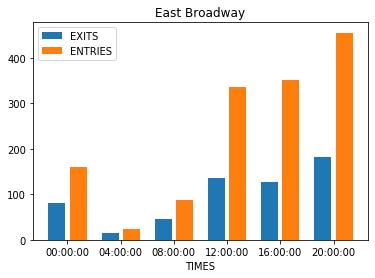

In [152]:
final_df4 = station_ent_data2.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
final_df5 = station_ent_data3.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
#plt.plot(final_df4.loc[:,'TIME'],final_df4.loc[:,'DIFF_ENTRIES'])
final_df4 = final_df4.loc['EAST BROADWAY']
final_df5 = final_df5.loc['EAST BROADWAY']
final_df4 = final_df4.reset_index().sort_values(['DAY']).set_index('TIME')
final_df5 = final_df5.reset_index().sort_values(['DAY']).set_index('TIME')

final_df4.drop(['10:05:49', '06:58:54','07:01:35','07:00:14','06:57:34','06:54:53','06:56:13', '06:49:30','06:52:12','06:53:33', '06:50:52', '09:26:36' ], inplace = True)
final_df5.drop(['10:05:49', '06:58:54','07:01:35','07:00:14','06:57:34','06:54:53','06:56:13', '06:49:30','06:52:12','06:53:33', '06:50:52', '09:26:36' ], inplace = True)
final_df4 = final_df4.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
final_df5 = final_df5.reset_index().sort_values(['TIME','DAY']).set_index('STATION')

final_df4 = final_df4.replace(['00:00:00','04:00:00','08:00:00','12:00:00','16:00:00','20:00:00'],[0, 2.5, 5, 7.5, 10, 12.5])
r1 = final_df4.loc[:,'TIME']
r2 = [x + 1 for x in r1]

plt.bar(r1,final_df5.loc[:,'DIFF_EXITS'], label='EXITS')
plt.bar(r2,final_df4.loc[:,'DIFF_ENTRIES'], label='ENTRIES')
plt.xticks([.5, 3, 5.5, 8, 10.5, 13],['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00','20:00:00'])
plt.legend(['EXITS','ENTRIES'])
plt.xlabel('TIMES')
plt.title('East Broadway')
plt.savefig('East Broadway')


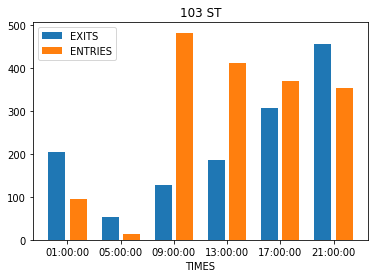

In [165]:
final_df4 = station_ent_data2.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
final_df5 = station_ent_data3.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
#plt.plot(final_df4.loc[:,'TIME'],final_df4.loc[:,'DIFF_ENTRIES'])
final_df4 = final_df4.loc['103 ST']
final_df5 = final_df5.loc['103 ST']
final_df4 = final_df4.reset_index().sort_values(['DAY']).set_index('TIME')
final_df5 = final_df5.reset_index().sort_values(['DAY']).set_index('TIME')
final_df4.drop(['14:06:54','08:56:17','08:06:06', '08:17:24'], inplace = True)
final_df5.drop(['14:06:54','08:56:17','08:06:06', '08:17:24'], inplace = True)
final_df4 = final_df4.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
final_df5 = final_df5.reset_index().sort_values(['TIME','DAY']).set_index('STATION')

final_df4 = final_df4.replace(['01:00:00','05:00:00','09:00:00','13:00:00','17:00:00','21:00:00'],[0, 2.5, 5, 7.5, 10, 12.5])

r1 = final_df4.loc[:,'TIME']
r2 = [x + 1 for x in r1]

plt.bar(r1,final_df5.loc[:,'DIFF_EXITS'], label='EXITS')
plt.bar(r2,final_df4.loc[:,'DIFF_ENTRIES'], label='ENTRIES')
plt.xticks([.5, 3, 5.5, 8, 10.5, 13],['01:00:00', '05:00:00', '09:00:00', '13:00:00', '17:00:00','21:00:00'])
plt.legend(['EXITS','ENTRIES'], loc=2 )
plt.xlabel('TIMES')
plt.title('103 ST')
plt.savefig('103 ST')

        STATION      TIME  TOTAL_TRAF
DAY                                  
6    LIVONIA AV  01:00:00        62.0
6    LIVONIA AV  05:00:00        19.0
6    LIVONIA AV  09:00:00        44.0
6    LIVONIA AV  13:00:00        68.0
6    LIVONIA AV  17:00:00        96.0
6    LIVONIA AV  21:00:00        86.0
[[50.0, 14.0, 255.0, 134.0, 209.0, 214.0], [63.0, 17.0, 270.0, 160.0, 210.0, 222.0], [65.0, 19.0, 285.0, 169.0, 228.0, 221.0], [61.0, 18.0, 283.0, 158.0, 228.5, 237.0], [72.0, 18.0, 250.0, 163.0, 234.0, 216.0], [74.5, 22.0, 81.0, 98.0, 117.0, 106.0], [62.0, 19.0, 44.0, 68.0, 96.0, 86.0]]


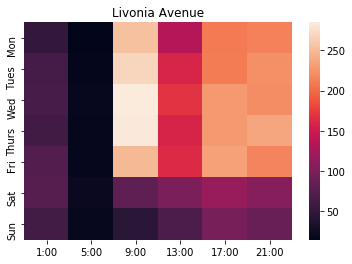

In [185]:
final_df6 = station_ent_data4.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
final_df6 = final_df6.reset_index().sort_values(['DAY']).set_index('TIME')
#final_df6.drop(['14:06:54','08:56:17','08:06:06', '08:17:24'], inplace = True)
final_df6.drop(['10:03:47', '04:55:40'], inplace = True)
#final_df6.drop(['10:05:49', '06:58:54','07:01:35','07:00:14','06:57:34','06:54:53','06:56:13', '06:49:30','06:52:12','06:53:33', '06:50:52', '09:26:36' ], inplace = True)
final_df6 = final_df6.reset_index().sort_values(['TIME','DAY']).set_index('STATION')
#final_df6 = final_df6.loc['103 ST']
final_df6 = final_df6.loc['LIVONIA AV']
#final_df6 = final_df6.loc['EAST BROADWAY']


list_times = []
for i in range(7):#final_df4.shape[0]):
    final_df7 = final_df6.reset_index().set_index('DAY')
    list1 = []
    final_df7 = final_df7.loc[i]
    list1 = final_df7.TOTAL_TRAF.tolist()
    list_times.append(list1)
print(final_df7)
print(list_times)
#for i in range(len(list_times)):
xlabels = ['1:00', '5:00', '9:00', '13:00', '17:00','21:00']
ylabels = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
heat = sns.heatmap(list_times, xticklabels = xlabels, yticklabels = ylabels)
heat.set_title('Livonia Avenue')
plt.savefig('Heat Livonia Avenue', dpi = 300)